In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, load_breast_cancer
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import minmax_scale
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import NearestCentroid


In [20]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KMeansWithInit:

    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]

        # the centers (mean vector) for each cluster
        self.centroids = []


    def predict(self, X, init_centroids):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # initialize

       
        self.centroids = init_centroids

        
    
        

        # optimize clusters
        for _ in range(self.max_iters):
            # assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            # calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)


    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx

        return labels


    def _create_clusters(self, centroids):
        # assign the samples to the closest centroids
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx


    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between old and new centroids, for all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self,target,title=''):
        fig, ax = plt.subplots(figsize=(10, 7))
        
        
        adl = LinearDiscriminantAnalysis(n_components=2)
        data2D = adl.fit_transform(X, target)

        ax.scatter(data2D[:, 0], data2D[:,1], c=target)

        #for i, index in enumerate(self.clusters):
         #   point = self.X[index].T
          #  print(point)
          #  ax.scatter(*point)


        #for point in self.centroids:
         #   ax.scatter(*point, marker="x", color="black", linewidth=2)

 

 
        plt.title(title)
        plt.show()



In [21]:
class KMeans:


    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]


        # the centers (mean vector) for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
       

        self.centroids = [self.X[idx] for idx in random_sample_idxs]


        # optimize clusters
        for _ in range(self.max_iters):
            # assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()


            # calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)


            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)


    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx


        return labels


    def _create_clusters(self, centroids):
        # assign the samples to the closest centroids
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters


    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx


    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids


    def _is_converged(self, centroids_old, centroids):
        # distances between old and new centroids, for all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0



    def plot(self,target,title=''):
        fig, ax = plt.subplots(figsize=(10, 7))
        
        
        adl = LinearDiscriminantAnalysis(n_components=2)
        data2D = adl.fit_transform(X, target)
        
        ax.scatter(data2D[:, 0], data2D[:,1], c=target)

        #for i, index in enumerate(self.clusters):
         #   point = self.X[index].T
          #  print(point)
          #  ax.scatter(*point)


        #for point in self.centroids:
         #   ax.scatter(*point, marker="x", color="black", linewidth=2)

 

 
        plt.title(title)
        plt.show()

In [27]:
data = pd.read_csv('Absenteeism_at_work.csv',sep=';')
data.head()

#brest_cancer = load_breast_cancer()
#data = brest_cancer.data

X = minmax_scale(data)


In [23]:
def get_best_nb_clusters(scores):
    maxi = 0
    k_max = 0
    for k,score in enumerate(scores):
        if score > maxi:
            k_max = k+2
            maxi = score
    
    return k_max

## HCA 

In [24]:
def evaluation_hca_and_khca(n_clusters, type_score='silhouette_score', target=None):
    score = 0
    
    kmean = KMeans(n_clusters)
    k_cla = kmean.predict(X)
    
    if type_score == 'silhouette_score':
        score = silhouette_score(X, k_cla, metric='euclidean')
    elif type_score == 'ari':
        score = adjusted_rand_score(brest_cancer.target, k_cla)
        
    kmean.plot(k_cla, f"KMeans with n_cluster = {n_clusters} and {type_score} = {score}")
    
    plt.figure(figsize=(10, 7))  
    hca = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward') 
    y_predict = hca.fit_predict(X)
    clf = NearestCentroid()
    clf.fit(X, y_predict)
    centroids_hca = clf.centroids_
    
    if type_score == 'silhouette_score':
        score = silhouette_score(X, y_predict, metric='euclidean')
    elif type_score == 'ari':
        score = adjusted_rand_score(brest_cancer.target, y_predict)
    
    plt.title(f"HCA with n_cluster = {n_clusters} and {type_score} = {score}")
    
    adl = LinearDiscriminantAnalysis(n_components=2)
    data2D = adl.fit_transform(X, y_predict)
    plt.scatter(data2D[:,0], data2D[:,1], c=y_predict)
    
    #for point in centroids_hca:
     #       plt.scatter(*point, marker="x", color="black", linewidth=2)
    #plt.show()
    
    
    kmean_with_init = KMeansWithInit(K=n_clusters)
    khca = kmean_with_init.predict(X, centroids_hca)
    
    if type_score == 'silhouette_score':
        score = silhouette_score(X, khca, metric='euclidean')
    elif type_score == 'ari':
        score = adjusted_rand_score(brest_cancer.target, khca)
     
    kmean_with_init.plot(khca,f"KHCA with n_cluster = {n_clusters} and {type_score} = {score}")

number of cluster = 3


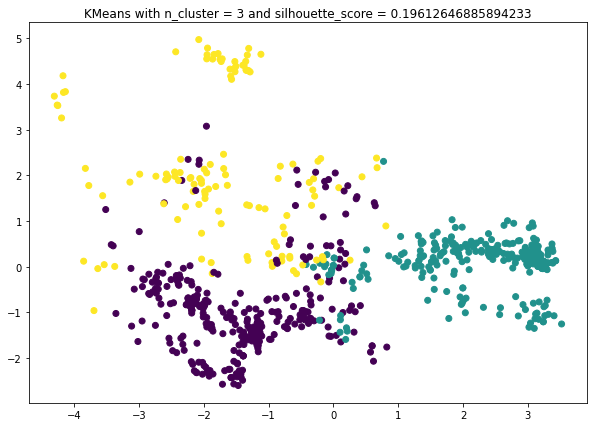

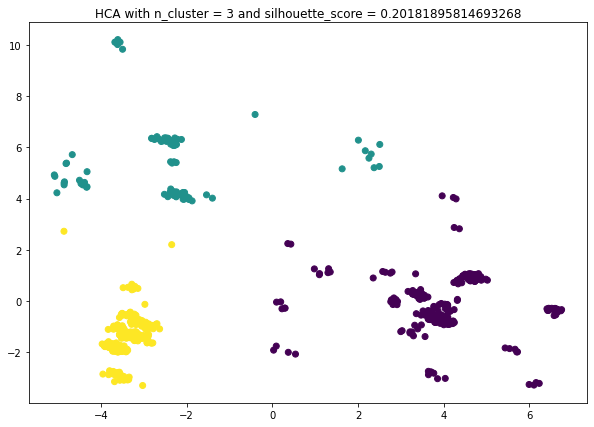

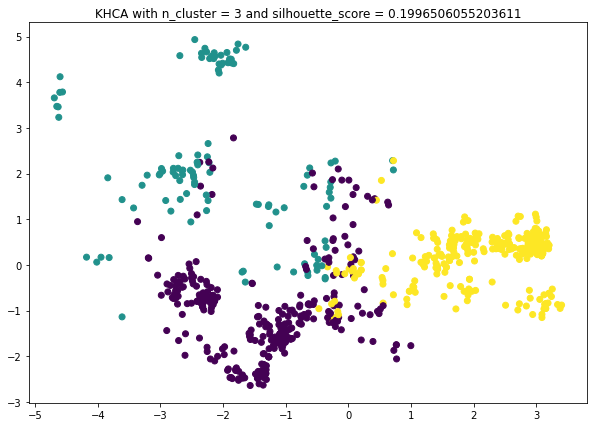




number of cluster = 4


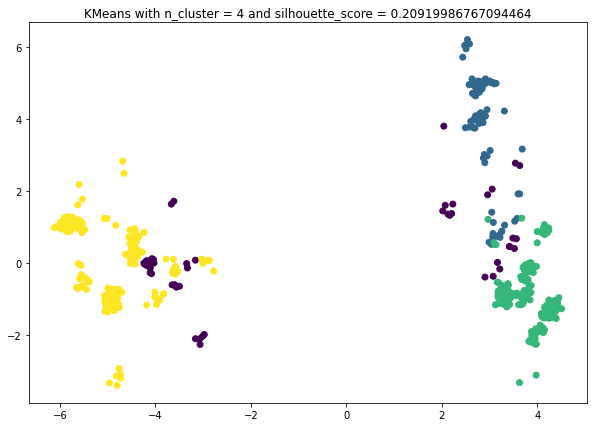

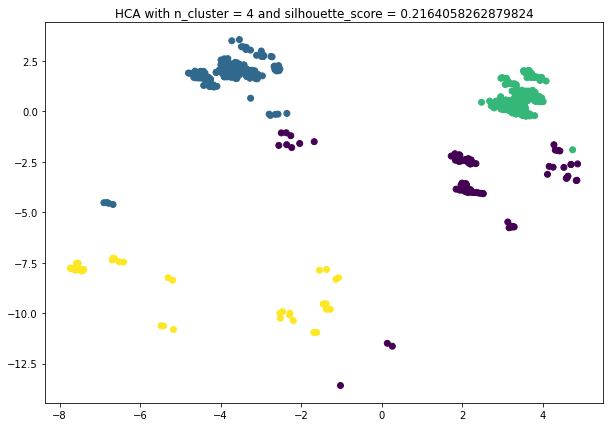

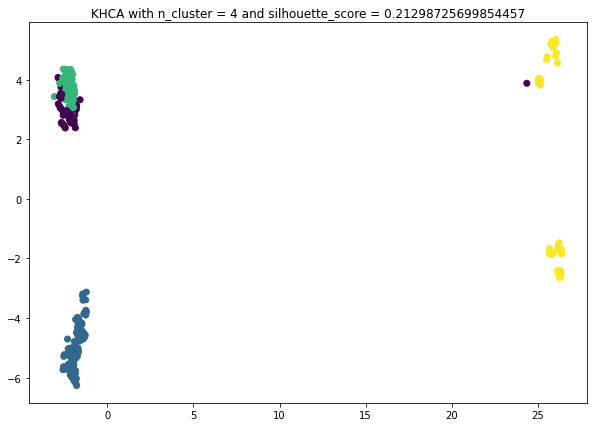




number of cluster = 5


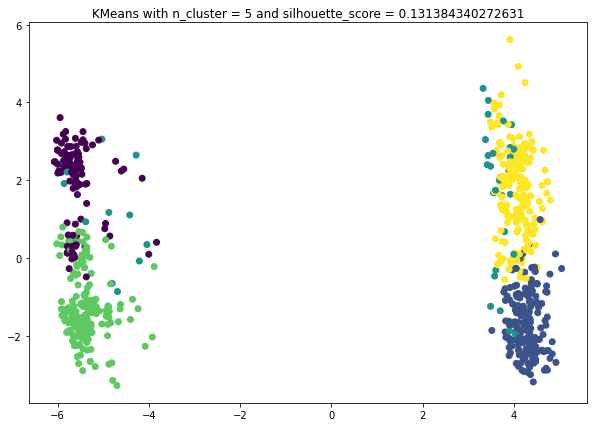

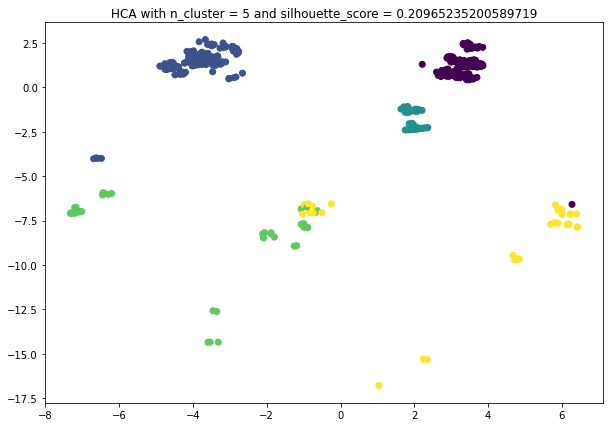

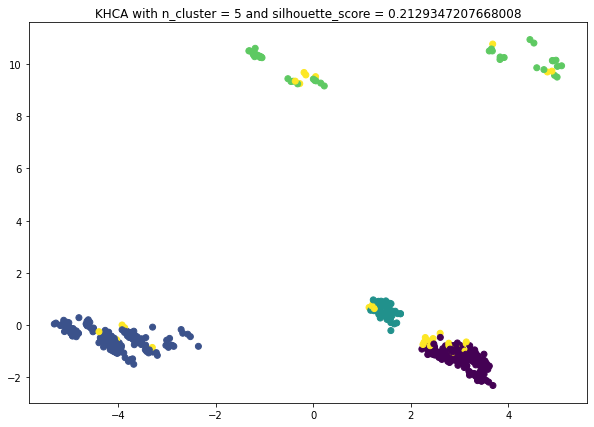




number of cluster = 6


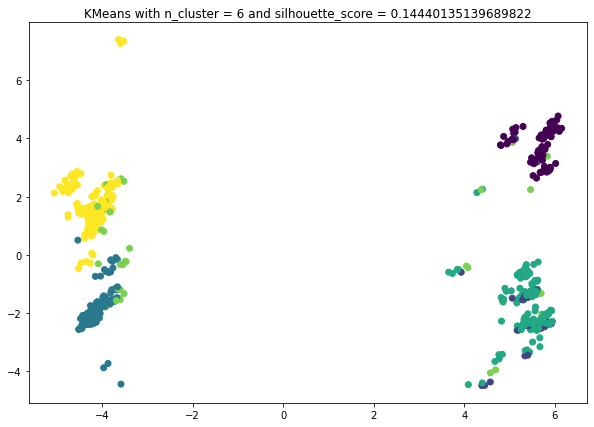

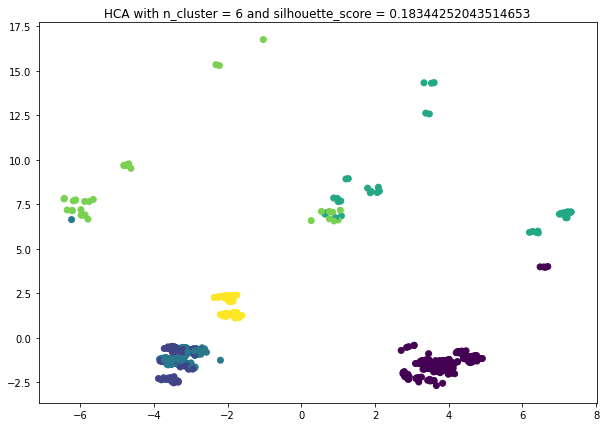

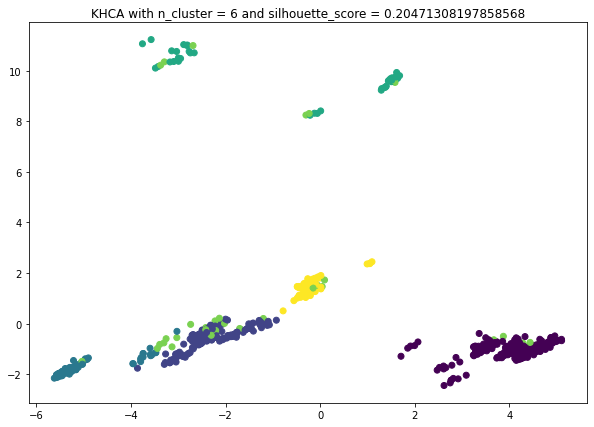




number of cluster = 7


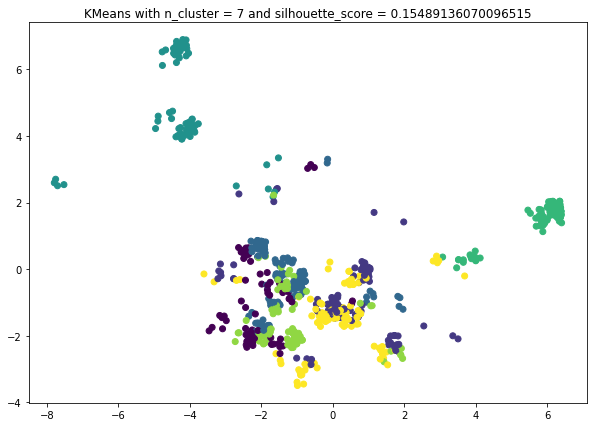

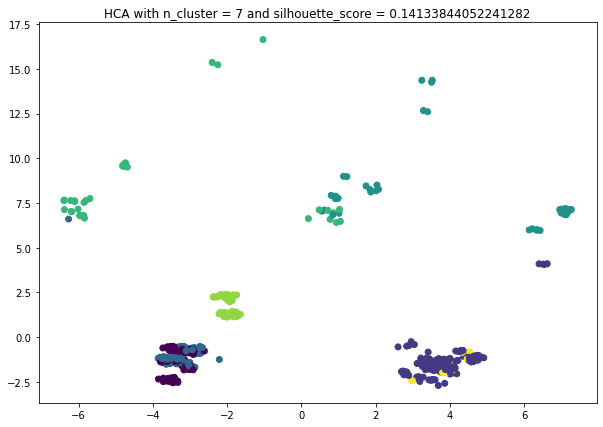

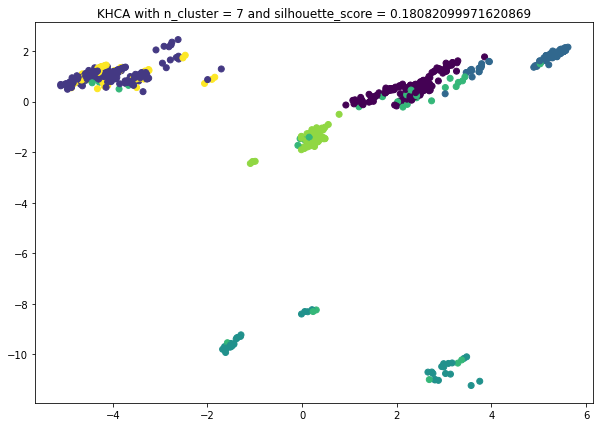




number of cluster = 8


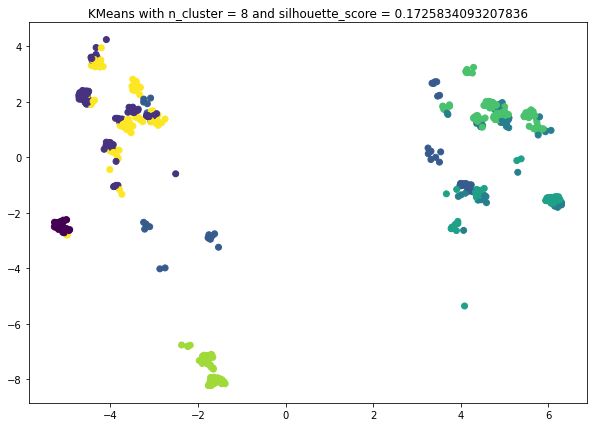

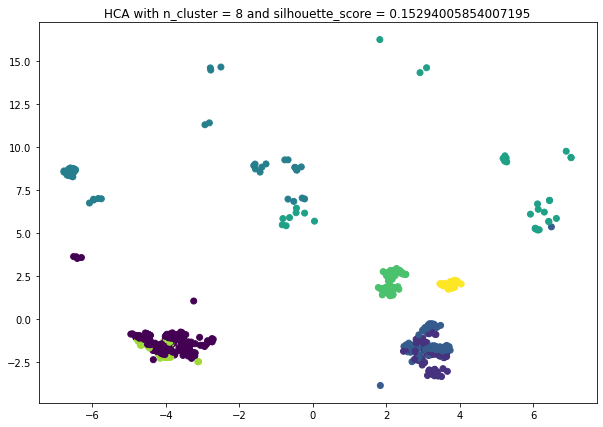

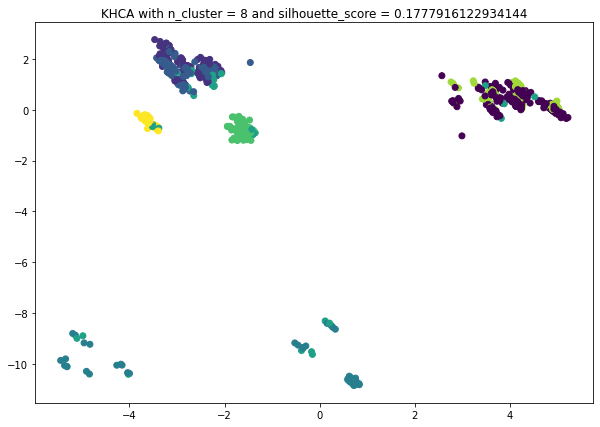




number of cluster = 9


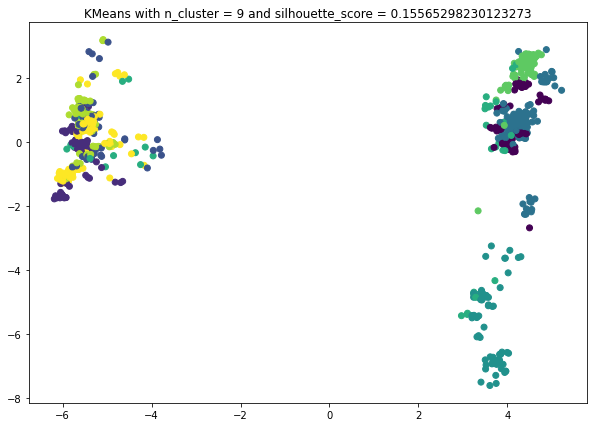

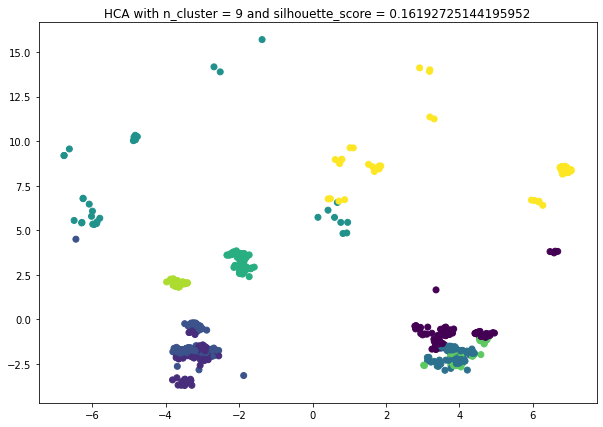

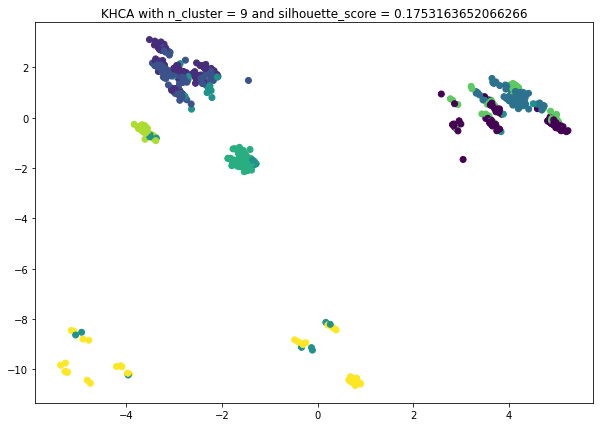

In [25]:
for k in range(3, 10):
    print(f"number of cluster = {k}")
    evaluation_hca_and_khca(k, type_score='silhouette_score')
    print("\n\n")
    